# Classification d'images MNIST traitées

# MNIST


## Importations

In [5]:
# importations
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# keras
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import plot_model, to_categorical

import seaborn as sns

# sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# tensorflow
from tensorflow.keras import optimizers

## Chargement des données



In [6]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


'/content/drive/MyDrive'

In [7]:

train_images = np.load("data/train_images.npy")
train_labels = np.load("data/train_labels.npy")
test_images = np.load("data/test_images.npy")
test_labels = np.load("data/test_labels.npy")

## Vérification des échantillons

In [8]:
print('Shapes of datasets')
print(f'train: {train_images.shape}')
print(f'test: {test_images.shape}')
nb_classes = len(set(train_labels))
print(f'For {nb_classes} classes: {set(train_labels)}')

Shapes of datasets
train: (60000, 28, 28, 1)
test: (10000, 28, 28, 1)
For 10 classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Train images shape: (60000, 28, 28, 1), Train labels shape: (60000,)
Test images shape: (10000, 28, 28, 1), Test labels shape: (10000,)
Number of classes: 10, Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


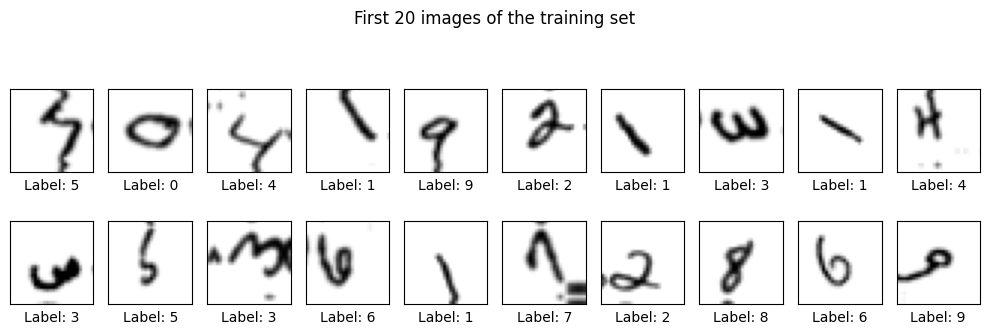

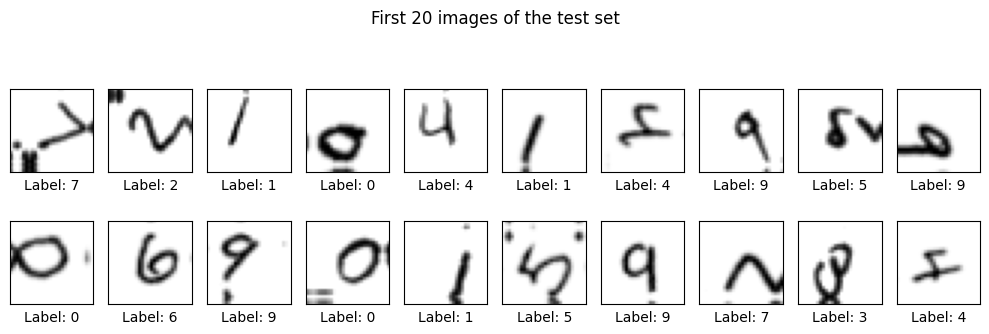

In [10]:


# Print the shape of the datasets and the number of classes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")
nb_classes = len(set(train_labels))
print(f'Number of classes: {nb_classes}, Classes: {sorted(set(train_labels))}')

# 2. Visualization of a subset of the training set
n = 20  # Number of images to display
cols = min(n, 10)  # Number of columns (up to 10)
rows = (n // cols) + 1  # Number of rows

plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the training set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {train_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the training set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()

# 3. Visualization of a subset of the test set
plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the test set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {test_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the test set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()



## Fully Connected Neural Network (FCNN)

In [12]:
# Converting images to float32
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
# Flattening the images
num_pixels = 28 * 28  # 784
rnn_train_images = train_images.reshape(train_images.shape[0], num_pixels)
rnn_test_images = test_images.reshape(test_images.shape[0], num_pixels)
# Data normalization
rnn_train_images = rnn_train_images / rnn_train_images.max()
rnn_test_images = rnn_test_images / rnn_test_images.max()

# Convert labels to one-hot encoding
train_labels_h = to_categorical(train_labels, nb_classes)
test_labels_h = to_categorical(test_labels, nb_classes)



In [13]:
# Shuffle the data
nb_examples = rnn_train_images.shape[0]  # number of examples
np.random.seed()
shuffle_index = np.random.permutation(nb_examples)
rnn_train_images = rnn_train_images[shuffle_index, :]
train_labels_h = train_labels_h[shuffle_index,]

In [44]:
# Create the rnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def rnn_model():
    """Construct and compile a fully connected neural network model for classification.

    Returns
    -------
    Sequential
      The compiled Keras Sequential model.
    """
    # Build the model
    model = Sequential()

    # First hidden layer with 256 neurons, ReLU activation
    model.add(Dense(256, activation='relu', input_shape=(28*28,)))

    # Dropout layer to minimize overfitting (30% dropout)
    model.add(Dropout(0.3))

    # Second hidden layer with 128 neurons, ReLU activation
    model.add(Dense(128, activation='relu'))

    # Output layer with softmax activation for multi-class classification (10 classes)
    model.add(Dense(10, activation='softmax'))

    # RMSprop optimizer with reduced learning rate
    optimizer = RMSprop(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

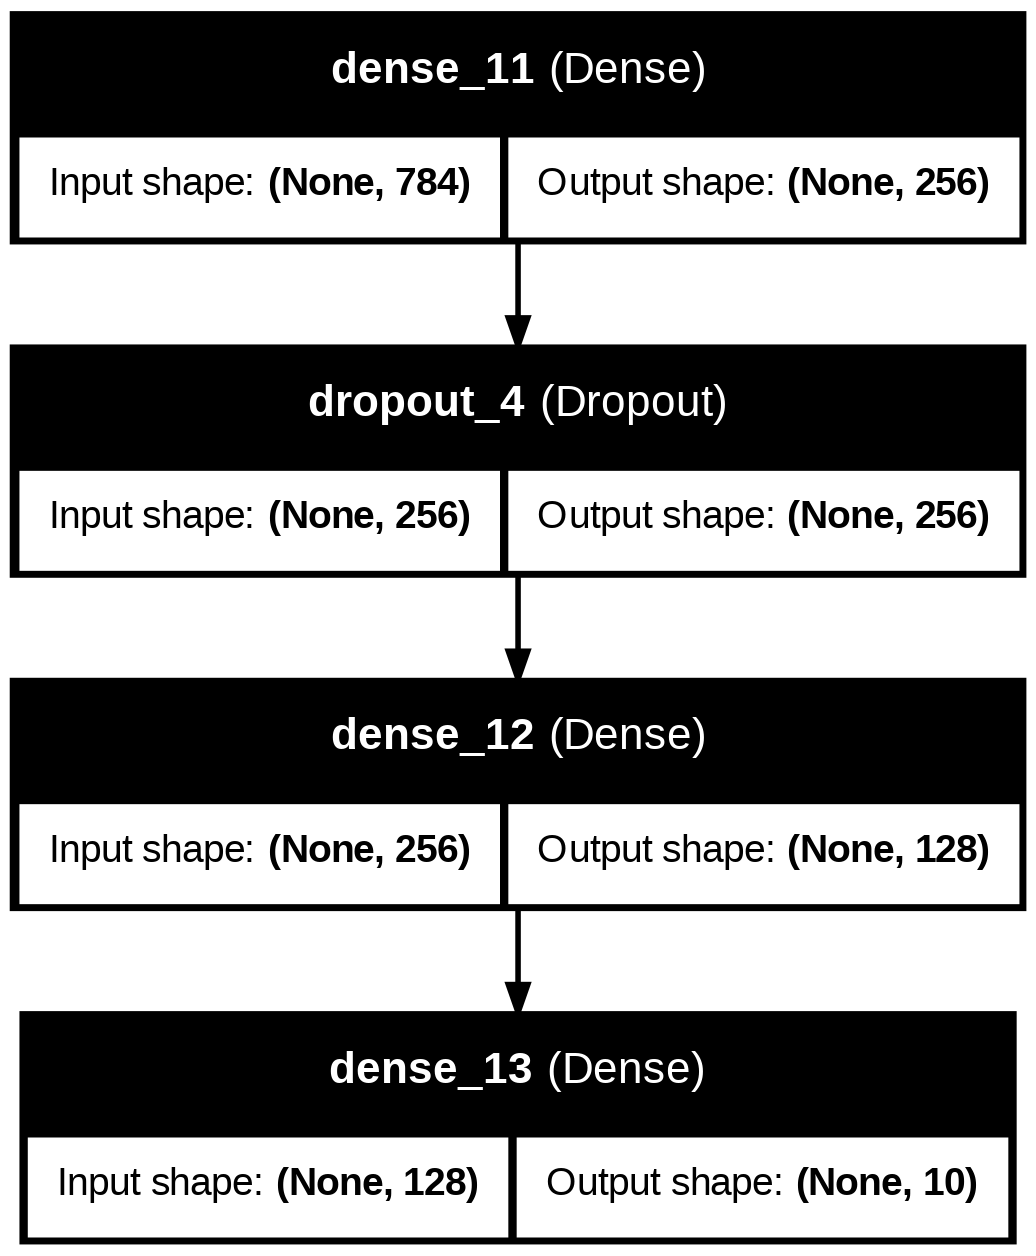

In [45]:

rnn_model = rnn_model()
rnn_model.summary()
plot_model(rnn_model, to_file="rnn_model.png", show_shapes=True, show_layer_names=True)

In [48]:
rnn_history = rnn_model.fit(rnn_train_images, train_labels_h, validation_split = 0.2, epochs=30, batch_size=128)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2798 - loss: 2.0081 - val_accuracy: 0.5639 - val_loss: 1.3166
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5555 - loss: 1.3286 - val_accuracy: 0.6914 - val_loss: 0.9985
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6296 - loss: 1.1142 - val_accuracy: 0.7181 - val_loss: 0.8839
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6820 - loss: 0.9764 - val_accuracy: 0.7568 - val_loss: 0.7611
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7089 - loss: 0.8985 - val_accuracy: 0.7852 - val_loss: 0.7062
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7333 - loss: 0.8169 - val_accuracy: 0.7868 - val_loss: 0.6853
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7508 - loss: 0.7711 - val_accuracy: 0.8034 - val_loss: 0.6254
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7669 - loss: 0.7231 - val_ac

In [49]:
rnn_scores = rnn_model.evaluate(rnn_test_images, test_labels_h)
print("Neural network accuracy: %.2f%%" % (rnn_scores[1] * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.4856
Neural network accuracy: 86.50%


### Performances

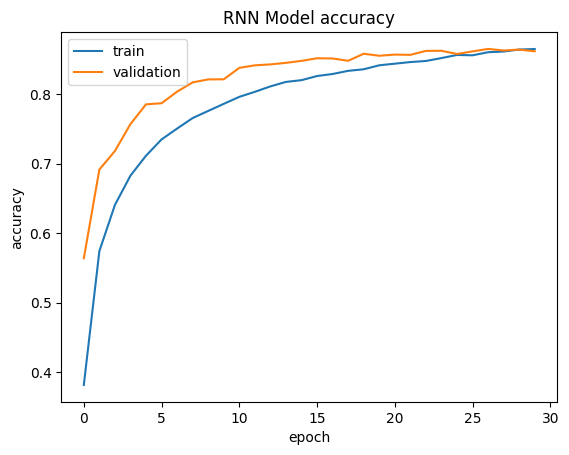

In [51]:
#  Accuracy
plt.plot(rnn_history.history["accuracy"])
plt.plot(rnn_history.history["val_accuracy"])
plt.title("RNN Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

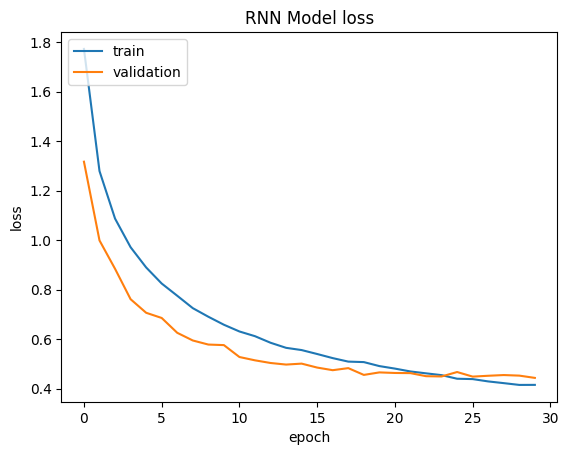

In [52]:
# Loss
plt.plot(rnn_history.history["loss"])
plt.plot(rnn_history.history["val_loss"])
plt.title("RNN Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [53]:
rnn_y_pred = rnn_model.predict(rnn_test_images)
rnn_y_pred_classes = np.argmax(rnn_y_pred, axis = 1)
rnn_y_pred_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 9, 6])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


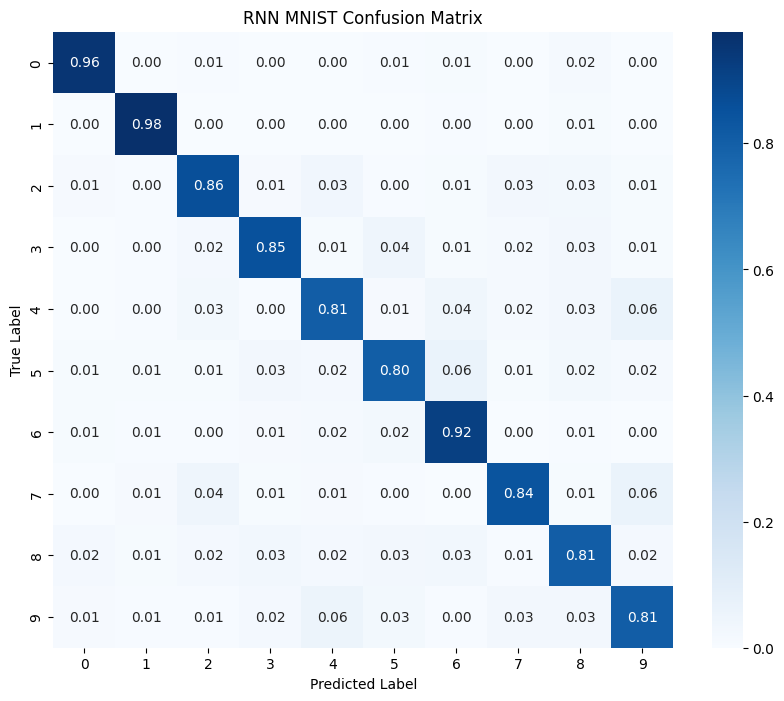

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_labels is already in the form of integer labels (not one-hot encoded)
y_test_classes = test_labels

# Get predictions
y_predrnn = rnn_model.predict(rnn_test_images)

# Convert predicted probabilities to class labels
y_predrnn_classes = np.argmax(y_predrnn, axis=1)

# Create confusion matrix with normalization
conf_matrix = confusion_matrix(y_test_classes, y_predrnn_classes, normalize="true")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RNN MNIST Confusion Matrix')
plt.show()


## Convolutional Neural Network (CNN)

### Pré-traitement

In [19]:
# NO RESHAPING NEEDED
cnn_train_images = train_images / train_images.max()
cnn_test_images = test_images / test_images.max()
# Shuffle the data
cnn_train_images = cnn_train_images[shuffle_index, :]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def cnn_model():
    """Construct and compile a convolutional neural network model.

    Returns
    -------
    Sequential
      The compiled Keras Sequential model.
    """
    # Build the model
    model = Sequential()

    # First convolution layer with 32 filters, ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))

    # Second convolution layer with 64 filters, ReLU activation
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the 2D matrices into vectors
    model.add(Flatten())

    # First dense hidden layer with 128 units, ReLU activation
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    # Dropout layer to minimize overfitting
    model.add(Dropout(0.3))

    # Output layer with 10 units (for 10 classes) and softmax activation
    model.add(Dense(10, activation='softmax'))

    # RMSprop optimizer
    opt = RMSprop(learning_rate=0.0005)

    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

    return model




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

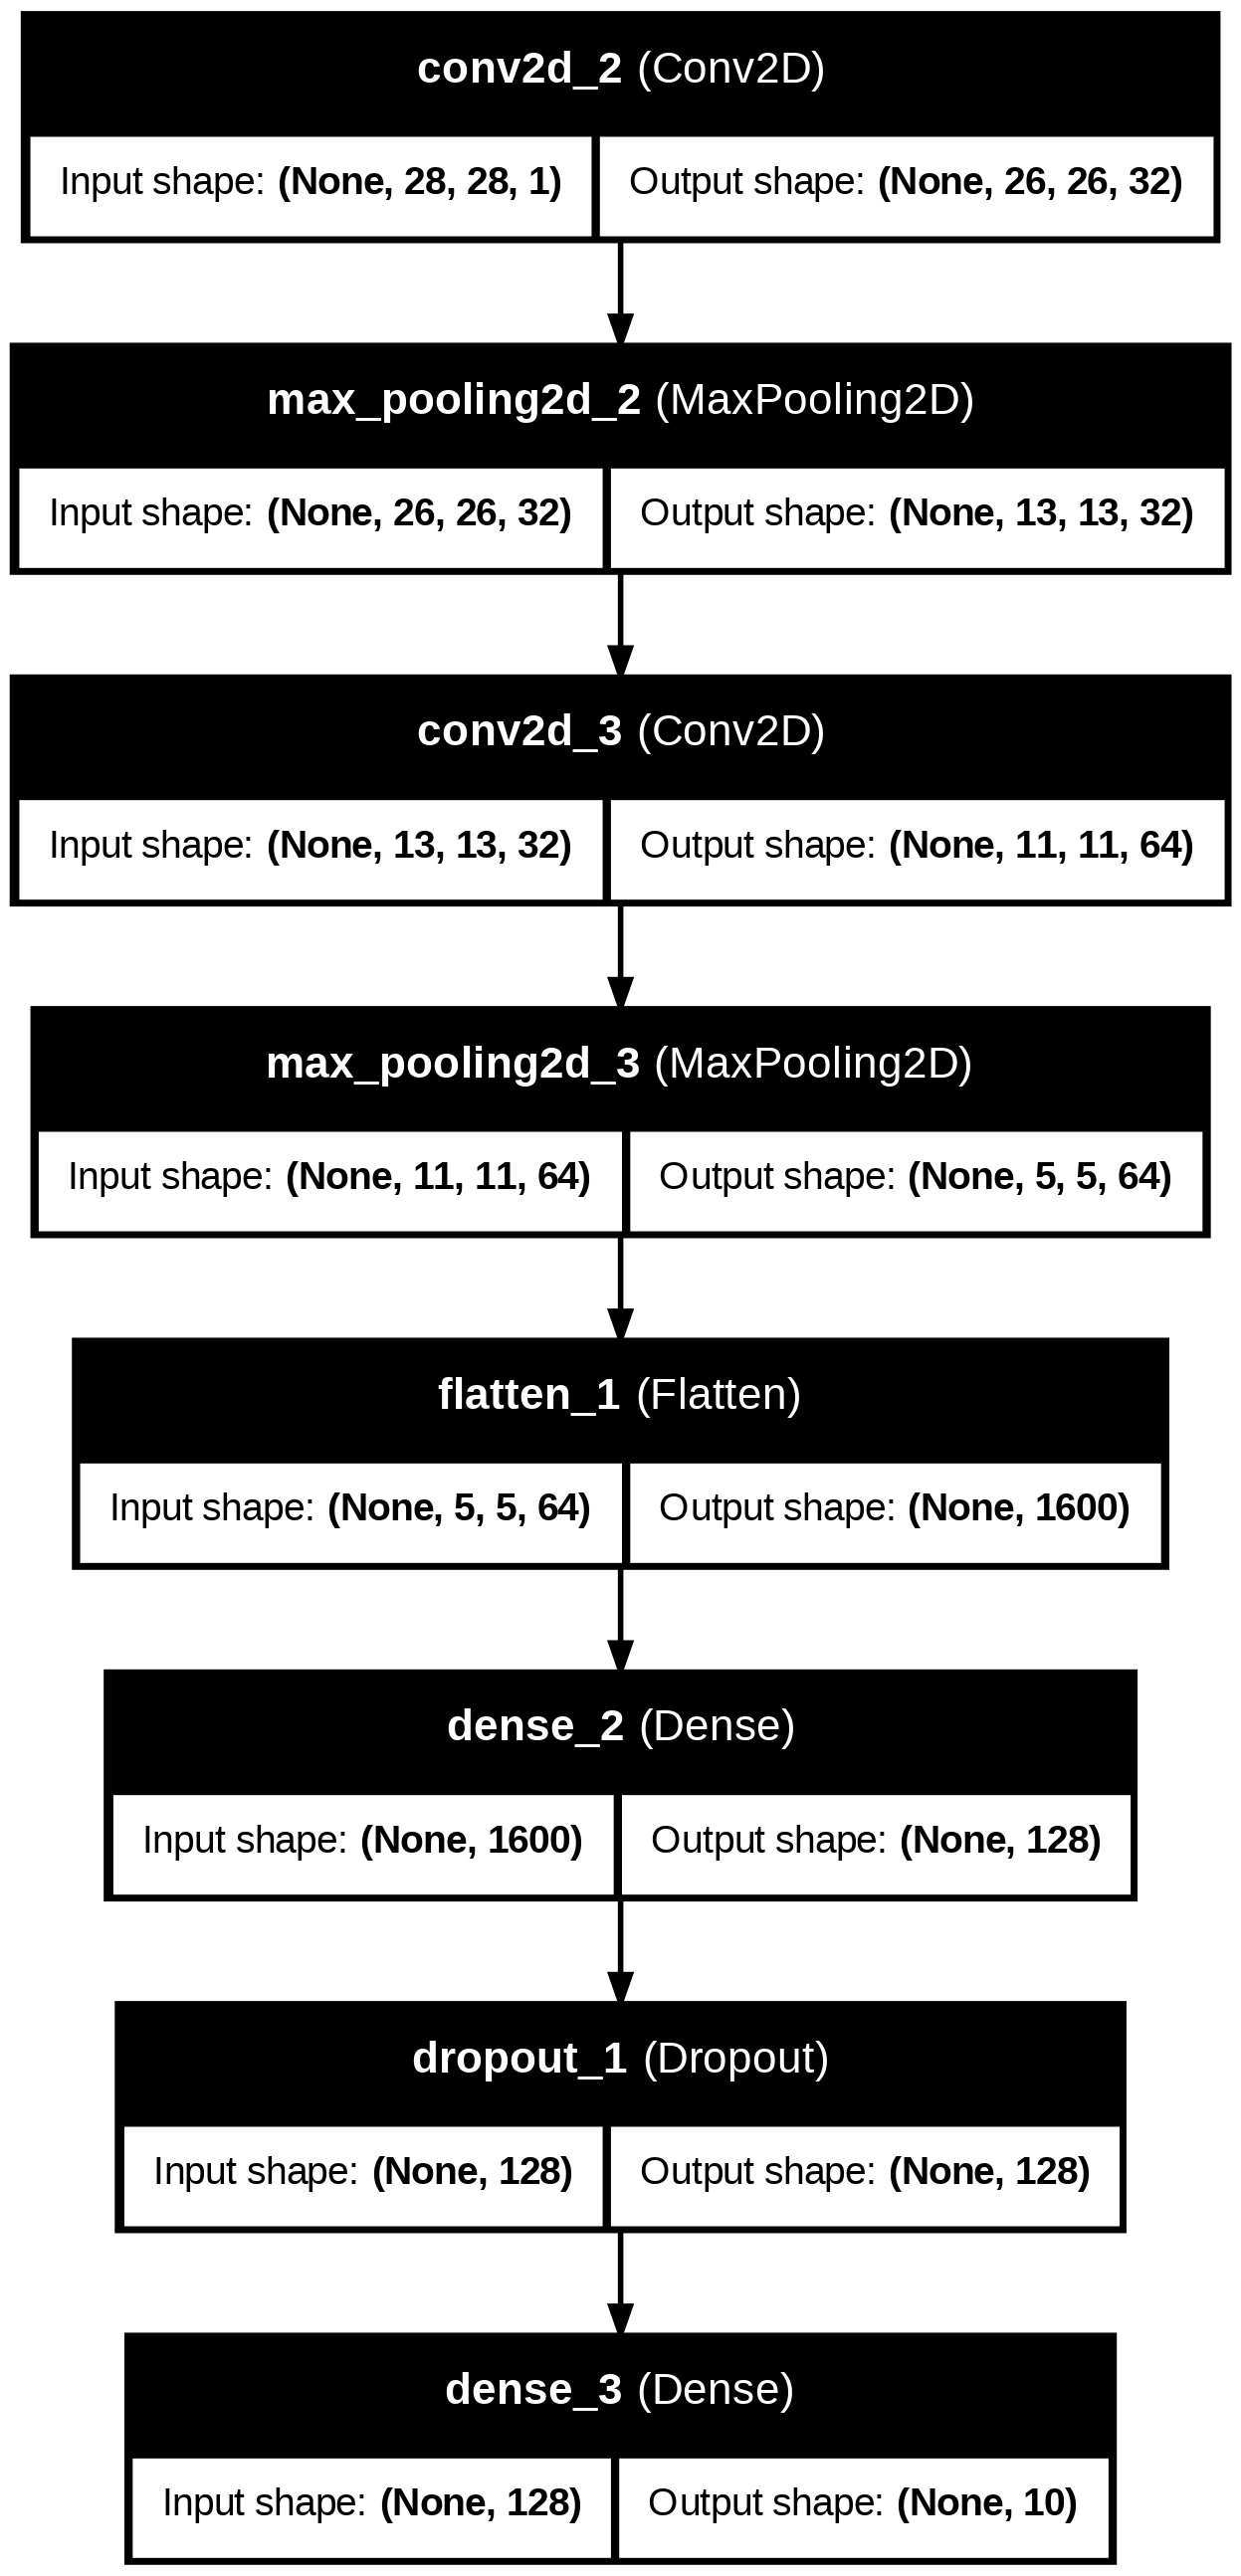

In [21]:
from keras.utils import plot_model, to_categorical

cnn_model = cnn_model()
cnn_model.summary()
plot_model(cnn_model, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

In [22]:
cnn_history = cnn_model.fit(cnn_train_images, train_labels_h, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.3439 - loss: 1.8611 - val_accuracy: 0.7240 - val_loss: 0.9385
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 115ms/step - accuracy: 0.6817 - loss: 0.9694 - val_accuracy: 0.8212 - val_loss: 0.5962
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 139ms/step - accuracy: 0.7815 - loss: 0.6958 - val_accuracy: 0.8634 - val_loss: 0.4567
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.8267 - loss: 0.5465 - val_accuracy: 0.8569 - val_loss: 0.4521
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.8516 - loss: 0.4657 - val_accuracy: 0.9003 - val_loss: 0.3337
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.8727 - loss: 0.4048 - val_accuracy: 0.8916 - val_loss: 0.3539
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.8862 - loss: 0.3651 - val_accuracy: 0.9006 - val_loss: 0.3195
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.8985 - loss: 0

In [24]:
cnn_scores = cnn_model.evaluate(cnn_test_images, test_labels_h)
print("Neural network accuracy: %.2f%%" % (cnn_scores[1] * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9199 - loss: 0.2667
Neural network accuracy: 93.06%


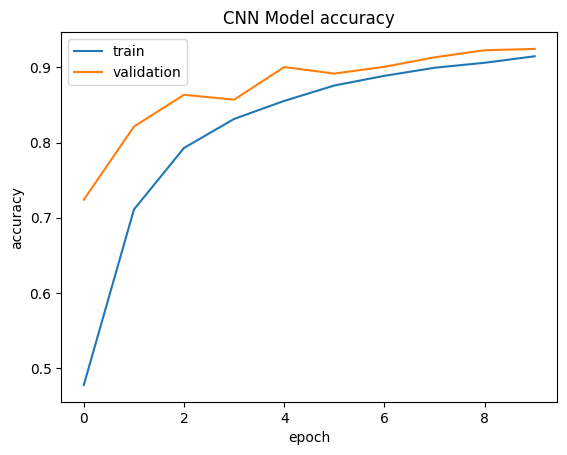

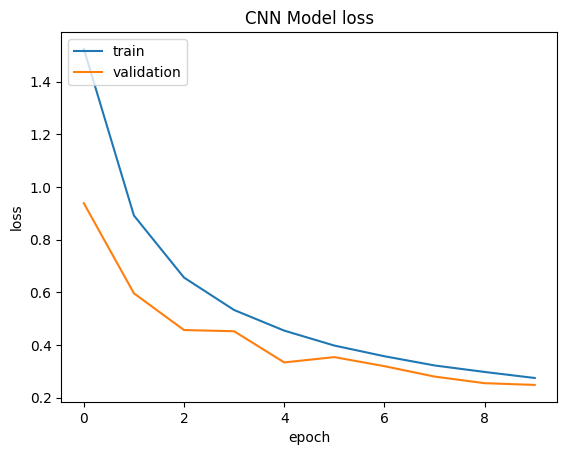

In [25]:
#  Accuracy
plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("CNN Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

# Loss
plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("CNN Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


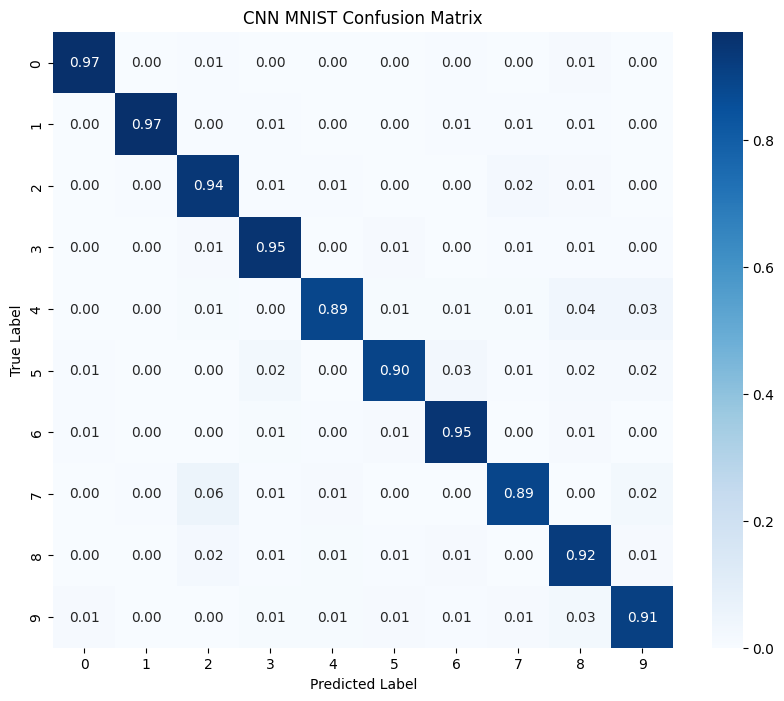

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_labels is already in the form of integer labels (not one-hot encoded)
ycnn_test_classes = test_labels

# Get predictions
y_predcnn = cnn_model.predict(cnn_test_images)

# Convert predicted probabilities to class labels
y_predcnn_classes = np.argmax(y_predcnn, axis=1)

# Create confusion matrix with normalization
conf_matrix_cnn = confusion_matrix(ycnn_test_classes, y_predcnn_classes, normalize="true")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN MNIST Confusion Matrix')
plt.show()
